In [0]:

# Install TensorFlow 2.0 alpha
!pip install tensorflow-gpu==2.0.0-alpha0

     |████████████████████████████████| 332.1MB 95kB/s 
     |████████████████████████████████| 419kB 39.7MB/s 
     |████████████████████████████████| 3.0MB 35.8MB/s 


In [0]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

# Get some knowledge about current environment 
print("TensorFlow version {}".format(tf.__version__))
print("Eager mode: ", tf.executing_eagerly())
print("Is GPU available: ", tf.test.is_gpu_available())

TensorFlow version 2.0.0-alpha0
Eager mode:  True
Is GPU available:  True


In [0]:
mnist = tf.keras.datasets.mnist
(images_train, labels_train),(images_test, labels_test) = mnist.load_data()
class_names = ["zero","one","two","three","four","five","six","seven","eight","nine"]

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
print("Data type:", type(images_train))
print("Dataset shape:", (images_train.shape))

Data type: <class 'numpy.ndarray'>
Dataset shape: (60000, 28, 28)


In [0]:
print("Labels:", len(labels_train))
print("Possible values:", np.unique(labels_train))

Labels: 60000
Possible values: [0 1 2 3 4 5 6 7 8 9]


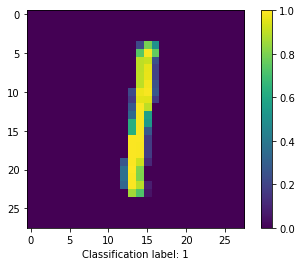

In [0]:
plt.figure()
plt.imshow(images_train[5500])
plt.colorbar()
plt.grid(False)
plt.xlabel("Classification label: {}".format(labels_train[5500]))
plt.show()

In [0]:
images_train = images_train / 255.0
images_test = images_test / 255.0

In [0]:
images_train[5500].shape

(28, 28)

In [0]:
images_train[5500][14,14]

0.9921568627450981

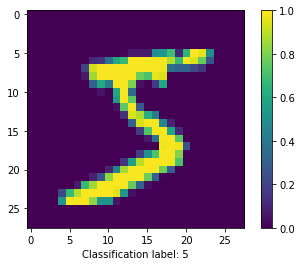

In [0]:
plt.figure()
plt.imshow(images_train[0])
plt.colorbar()
plt.grid(False)
plt.xlabel("Classification label: {}".format(labels_train[0]))
plt.show()

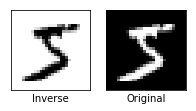

In [0]:
plt.figure(figsize=(10, 10))

plt.subplot(3, 6, 1)
plt.xticks([])
plt.yticks([])
plt.xlabel("Inverse")
plt.imshow(images_train[0], cmap=plt.cm.binary)

plt.subplot(3, 6, 2)
plt.xticks([])
plt.yticks([])
plt.xlabel("Original")
plt.imshow(images_train[0], cmap=plt.cm.gray)

In [0]:
model = keras.models.Sequential([
  keras.layers.Flatten(input_shape=(28,28)),
  keras.layers.Dense(512, activation=tf.nn.relu),
  keras.layers.Dropout(0.2),
  keras.layers.Dense(512, activation=tf.nn.relu),
  keras.layers.Dropout(0.2),
  keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
model.fit(images_train, labels_train, epochs=16)

Epoch 1/16
60000/60000 [==============================] - 10s 175us/sample - loss: 0.2110 - accuracy: 0.9362
Epoch 2/16
60000/60000 [==============================] - 10s 158us/sample - loss: 0.1060 - accuracy: 0.9676
Epoch 3/16
60000/60000 [==============================] - 10s 159us/sample - loss: 0.0800 - accuracy: 0.9750
Epoch 4/16
60000/60000 [==============================] - 10s 159us/sample - loss: 0.0663 - accuracy: 0.9792
Epoch 5/16
60000/60000 [==============================] - 10s 159us/sample - loss: 0.0571 - accuracy: 0.9822
Epoch 6/16
60000/60000 [==============================] - 10s 159us/sample - loss: 0.0517 - accuracy: 0.9844
Epoch 7/16
60000/60000 [==============================] - 10s 159us/sample - loss: 0.0488 - accuracy: 0.9848
Epoch 8/16
60000/60000 [==============================] - 10s 166us/sample - loss: 0.0376 - accuracy: 0.9883
Epoch 9/16
60000/60000 [==============================] - 9s 158us/sample - loss: 0.0421 - accuracy: 0.9873
Epoch 10/16
60000/60

In [0]:
model.fit(images_train, labels_train,validation_data=(images_test,labels_test), epochs=16)

Train on 60000 samples, validate on 10000 samples
Epoch 1/16
60000/60000 [==============================] - 11s 178us/sample - loss: 0.0304 - accuracy: 0.9916 - val_loss: 0.0872 - val_accuracy: 0.9826
Epoch 2/16
60000/60000 [==============================] - 11s 177us/sample - loss: 0.0258 - accuracy: 0.9930 - val_loss: 0.0972 - val_accuracy: 0.9824
Epoch 3/16
60000/60000 [==============================] - 10s 173us/sample - loss: 0.0280 - accuracy: 0.9923 - val_loss: 0.0934 - val_accuracy: 0.9827
Epoch 4/16
60000/60000 [==============================] - 10s 174us/sample - loss: 0.0260 - accuracy: 0.9931 - val_loss: 0.0970 - val_accuracy: 0.9839
Epoch 5/16
60000/60000 [==============================] - 10s 172us/sample - loss: 0.0292 - accuracy: 0.9928 - val_loss: 0.0934 - val_accuracy: 0.9835
Epoch 6/16
60000/60000 [==============================] - 10s 172us/sample - loss: 0.0251 - accuracy: 0.9932 - val_loss: 0.1007 - val_accuracy: 0.9840
Epoch 7/16
60000/60000 [====================

In [0]:
test_loss, test_acc = model.evaluate(images_test, labels_test)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 85us/sample - loss: 0.1223 - accuracy: 0.9820
Test accuracy: 0.982


In [0]:
example_img = images_test[0]

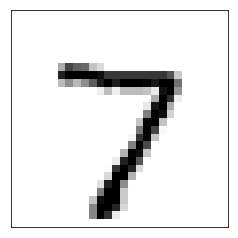

In [0]:
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.imshow(example_img, cmap=plt.cm.binary)

In [0]:
example_img.shape

(28, 28)

In [0]:
example_img_as_input = (np.expand_dims(example_img,0))
print("Image data shape:", example_img_as_input.shape)

img_prediction = model.predict(example_img_as_input)
print("Prediction results:", img_prediction)
print("Predicted value:", np.argmax(img_prediction))

Image data shape: (1, 28, 28)
Prediction results: [[6.1987276e-22 1.0758659e-17 2.2168702e-14 1.4878951e-12 3.1827694e-16
  3.2629074e-18 5.9229971e-29 9.9999917e-01 7.7859252e-15 8.4192936e-07]]
Predicted value: 7


In [0]:
aa=[0,1,2,3,4,5,6,7,8,9]
print(np.argmax(aa))

9


In [0]:
class_names = ["zero","one","two","three","four","five","six","yedi","eight","nine"]
print(class_names[np.argmax(img_prediction)])

yedi


In [0]:
# Helper functions

import matplotlib.pyplot as plt
import numpy as np


def plot_image(i, predictions_array, true_label, img, class_names):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100 * np.max(predictions_array),
                                         class_names[true_label]),
               color=color)


def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

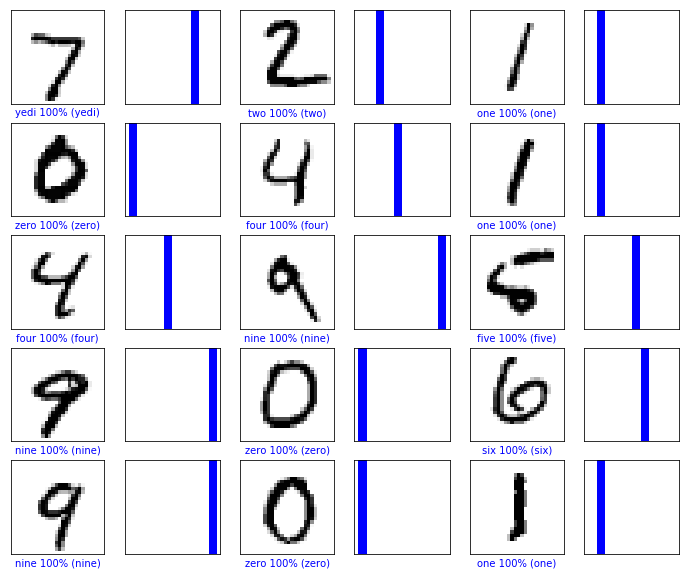

In [0]:
predictions = model.predict(images_test)

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2  *2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, labels_test, images_test, class_names)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, labels_test)

In [0]:
model.summary()
loss, acc = model.evaluate(images_test, labels_test)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))
print("Restored model, loss: {}".format(loss))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
__________________________________________________

In [0]:
keras_mnist_model = 'mnist_model.h5'

In [0]:
keras.experimental.export_saved_model(model, keras_mnist_model)

W0729 06:34:35.619319 140090517772160 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/saved_model/signature_def_utils_impl.py:253: build_tensor_info (from tensorflow.python.saved_model.utils_impl) is deprecated and will be removed in a future version.
Instructions for updating:
This function will only be available through the v1 compatibility library as tf.compat.v1.saved_model.utils.build_tensor_info or tf.compat.v1.saved_model.build_tensor_info.
W0729 06:34:35.622073 140090517772160 tf_logging.py:161] Export includes no default signature!
W0729 06:34:36.423524 140090517772160 tf_logging.py:161] Export includes no default signature!


In [0]:
!ls

mnist_model.h5	sample_data


In [0]:
new_model = keras.experimental.load_from_saved_model(keras_mnist_model)
print(new_model.get_config())

#Get input shape from model.get_config()
new_model.build((None, 28, 28, 1))
new_model.summary()

{'name': 'sequential', 'layers': [{'class_name': 'Flatten', 'config': {'name': 'flatten', 'trainable': True, 'batch_input_shape': (None, 28, 28), 'dtype': 'float32', 'data_format': 'channels_last'}}, {'class_name': 'Dense', 'config': {'name': 'dense', 'trainable': True, 'dtype': 'float32', 'units': 512, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}}, {'class_name': 'Dropout', 'config': {'name': 'dropout', 'trainable': True, 'dtype': 'float32', 'rate': 0.2, 'noise_shape': None, 'seed': None}}, {'class_name': 'Dense', 'config': {'name': 'dense_1', 'trainable': True, 'dtype': 'float32', 'units': 512, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bia

In [0]:
# The model has to be compiled before the evaluation
new_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:

loss, acc = new_model.evaluate(images_test, labels_test)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))
print("Restored model, loss: {}".format(loss))

10000/10000 [==============================] - 1s 96us/sample - loss: 0.1223 - accuracy: 0.9820
Restored model, accuracy: 98.20%
Restored model, loss: 0.12228678564871631


In [0]:
tflite_mnist_model = "mnist_model.tflite"

# Get the concrete function from the Keras model.
run_model = tf.function(lambda x : new_model(x))

# Save the concrete function.
concrete_func = run_model.get_concrete_function(
    tf.TensorSpec(new_model.inputs[0].shape, new_model.inputs[0].dtype)
)

# Convert the model.
converter = tf.lite.TFLiteConverter.from_concrete_function(concrete_func)
tflite_model = converter.convert()
open(tflite_mnist_model, "wb").write(tflite_model)

5359976

In [0]:
!ls

mnist_model.h5	mnist_model.tflite  sample_data


In [0]:
interpreter = tf.lite.Interpreter(model_path=tflite_mnist_model)
interpreter.allocate_tensors()

print("== Input details ==")
print("name:", interpreter.get_input_details()[0]['name'])
print("shape:", interpreter.get_input_details()[0]['shape'])
print("type:", interpreter.get_input_details()[0]['dtype'])

print("\n== Output details ==")
print("name:", interpreter.get_output_details()[0]['name'])
print("shape:", interpreter.get_output_details()[0]['shape'])
print("type:", interpreter.get_output_details()[0]['dtype'])

print("\nDUMP INPUT")
print(interpreter.get_input_details()[0])
print("\nDUMP OUTPUT")
print(interpreter.get_output_details()[0])

== Input details ==
name: x
shape: [ 1 28 28]
type: <class 'numpy.float32'>

== Output details ==
name: Identity
shape: [ 1 10]
type: <class 'numpy.float32'>

DUMP INPUT
{'name': 'x', 'index': 16, 'shape': array([ 1, 28, 28], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0)}

DUMP OUTPUT
{'name': 'Identity', 'index': 0, 'shape': array([ 1, 10], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0)}


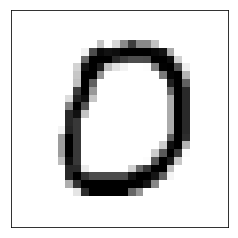

In [0]:
example_img_for_tflite = images_test[10]

plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.imshow(example_img_for_tflite, cmap=plt.cm.binary)

In [0]:
example_img_for_tflite = np.expand_dims(example_img_for_tflite,0).astype(np.float32)
print("Input data shape:", example_img_for_tflite.shape)
print("Input data type:", example_img_for_tflite.dtype)

input_details = interpreter.get_input_details()
interpreter.set_tensor(input_details[0]['index'], example_img_for_tflite)

interpreter.invoke()

output_details = interpreter.get_output_details()
output_data = interpreter.get_tensor(output_details[0]['index'])
print("\n\nPrediction results:", output_data)
print("Predicted value:", np.argmax(output_data))

Input data shape: (1, 28, 28)
Input data type: float32


Prediction results: [[1.0000000e+00 0.0000000e+00 2.2970855e-39 0.0000000e+00 2.0739217e-43
  3.3631163e-44 4.3347176e-36 3.5781175e-40 4.2038954e-45 3.4401877e-32]]
Predicted value: 0


Prediction results: [[1.0000000e+00 0.0000000e+00 1.1069079e-37 5.0214830e-40 2.0937760e-35
  3.3713773e-21 2.5499799e-36 5.9045878e-16 3.1450084e-38 1.5407789e-32]]
Predicted value: 0


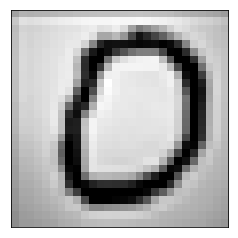

In [0]:
from PIL import Image
import PIL.ImageOps  
import requests

imgUrl = "https://raw.githubusercontent.com/frogermcs/MNIST-TFLite/master/notebooks/test.png"
img = Image.open(requests.get(imgUrl, stream=True).raw).convert('L')
img.load()
img = PIL.ImageOps.invert(img)
data = np.asarray( img, dtype="int32" )

plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.imshow(data, cmap=plt.cm.binary)

data = data / 255.0
inputImg = np.expand_dims(data,0).astype(np.float32)
inputImg.shape

input_details = interpreter.get_input_details()
interpreter.set_tensor(input_details[0]['index'], inputImg)

interpreter.invoke()

output_details = interpreter.get_output_details()
output_data = interpreter.get_tensor(output_details[0]['index'])
print("Prediction results:", output_data)
print("Predicted value:", np.argmax(output_data))